In [129]:
import pandas as pd
import numpy as np
import zipfile
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
df = pd.read_csv('../data/scores_analysis.csv').iloc[:,1:]
df.head()


,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,underdog_neg_prop,favorite_pos_prop,favorite_neg_prop,Score Differential,spread_clean,Favorite_Win,prop_within3,num_switches,info_scrape_fav,info_scrape_dog
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.361702,0.437500,0.281250,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.306818,0.333333,0.240741,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.328859,0.390000,0.370000,6,6.5,W,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.305936,0.333333,0.413043,-20,2.5,L,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.400000,0.402827,0.360424,3,10.0,W,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...


In [131]:
df['spread_w_neg'] = df['spread_clean']
df.loc[(df['Score Differential'] < 0),'spread_w_neg'] = df.loc[(df['Score Differential'] < 0),'spread_clean']*-1
df.head()

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,favorite_pos_prop,favorite_neg_prop,Score Differential,spread_clean,Favorite_Win,prop_within3,num_switches,info_scrape_fav,info_scrape_dog,spread_w_neg
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.437500,0.281250,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.333333,0.240741,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.390000,0.370000,6,6.5,W,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.333333,0.413043,-20,2.5,L,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.402827,0.360424,3,10.0,W,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0


In [193]:
df['num_underdog_comments'] = df['underdog_flair'].apply(eval).apply(sum)
df['num_favorite_comments'] = df['favorite_flair'].apply(eval).apply(sum)
df['num_neutral_comments'] = df['all_comments'].apply(eval).apply(len) - df['num_underdog_comments'] - df['num_favorite_comments']
df.head()

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,prop_within3,num_switches,info_scrape_fav,info_scrape_dog,spread_w_neg,num_underdog_comments,num_favorite_comments,num_neutral_comments,fans_col,fans_col_std
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0,47,32,495,79,-2.099031
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0,88,108,145,196,-0.906464
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5,149,200,183,349,0.653047
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5,219,138,144,357,0.734590
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0,60,283,187,343,0.591890


# Sentient Graphs

In [107]:
ante_close = (df['spread_clean'] < 4)
ante_blowout = (df['spread_clean'] >= 4)
post_fav = (df['Score Differential'] >= 4)
post_close = (df['Score Differential'] < 4) & (df['Score Differential'] > -4)
post_dog = (df['Score Differential'] <= -4)

In [108]:
def make_sentiment_graph(df, title='', filter_col = 'Score Differential', prop = False, ax = None,weighted=True):
    if prop:
        scores = np.arange(0,1.01,0.01)
    else:
        scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
    mean_pos_dog_prop = []
    mean_neg_dog_prop = []
    mean_pos_fav_prop = []
    mean_neg_fav_prop = []
    num = []
    for i in scores:
        if prop:
            smoll_df = df[round(df[filter_col],1)==i]
        else:
            smoll_df = df[df[filter_col]==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_neg_dog_prop.append(np.nan)
            mean_pos_dog_prop.append(np.nan)
            mean_pos_fav_prop.append(np.nan)
            mean_neg_fav_prop.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_pos_dog_prop.append(smoll_df['underdog_pos_prop'].mean())
            mean_neg_dog_prop.append(smoll_df['underdog_neg_prop'].mean())
            mean_pos_fav_prop.append(smoll_df['favorite_pos_prop'].mean())
            mean_neg_fav_prop.append(smoll_df['favorite_neg_prop'].mean())

    dog_prop = [mean_pos_dog_prop[i]/(mean_pos_dog_prop[i] + mean_neg_dog_prop[i]) for i in range(len(mean_pos_dog_prop))]
    fav_prop = [mean_pos_fav_prop[i]/(mean_pos_fav_prop[i] + mean_neg_fav_prop[i]) for i in range(len(mean_pos_dog_prop))]

    min_1 = min([x for x in dog_prop if not np.isnan(x)])
    min_2 = min([x for x in fav_prop if not np.isnan(x)])

    max_1 = max([x for x in dog_prop if not np.isnan(x)])
    max_2 = max([x for x in fav_prop if not np.isnan(x)])
    
    if ax is None:
        ax = plt.gca()
        
    ax.set_title(title)
    if weighted:
        ax.scatter(scores, dog_prop, label='Underdog Proportion Positive', color = 'g',s=num)
        ax.scatter(scores, fav_prop, label='Favorite Proportion Positive', color = 'r',s=num)
    else:
        ax.scatter(scores, dog_prop, label='Underdog Proportion Positive', color = 'g')
        ax.scatter(scores, fav_prop, label='Favorite Proportion Positive', color = 'r')
    ax.legend()
    ax.set_xlabel(filter_col)
    ax.set_ylabel('Average Proportion of Comments')
    ax.set_ylim(min(min_1, min_2)-0.02, max(max_1,max_2)+0.02)
    
    return min(min_1, min_2), max(max_1,max_2)

## Sentinent vs Final Score

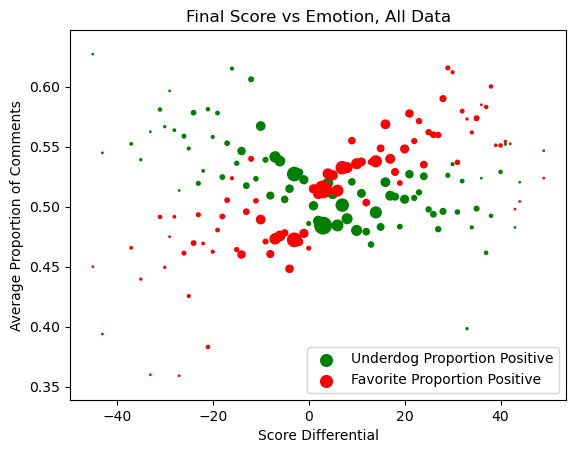

In [186]:
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.3})

make_sentiment_graph(df, title='Final Score vs Emotion, All Data', 
                     filter_col = 'Score Differential', prop = False, ax = axs, weighted = True);


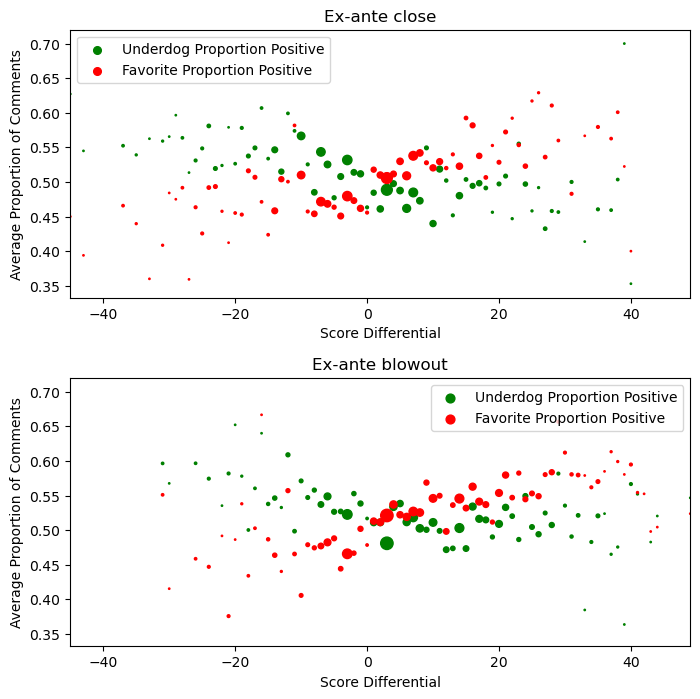

In [113]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'hspace': 0.3})

weighted_all = True
filter_col_all = 'Score Differential'

min_1, max_1 = make_sentiment_graph(df[ante_close], 
                     title='Ex-ante close', 
                     filter_col = filter_col_all, prop = False, ax = axs[0], weighted = weighted_all)

min_2, max_2 = make_sentiment_graph(df[ante_blowout], 
                     title='Ex-ante blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[1], weighted = weighted_all)

axs[0].set_ylim(min(min_1, min_2)-0.02, 
                   max(max_1,max_2)+0.02)
axs[0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1].set_ylim(min(min_1, min_2)-0.02, 
                   max(max_1,max_2)+0.02)
axs[1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

## Sentinent vs Spread

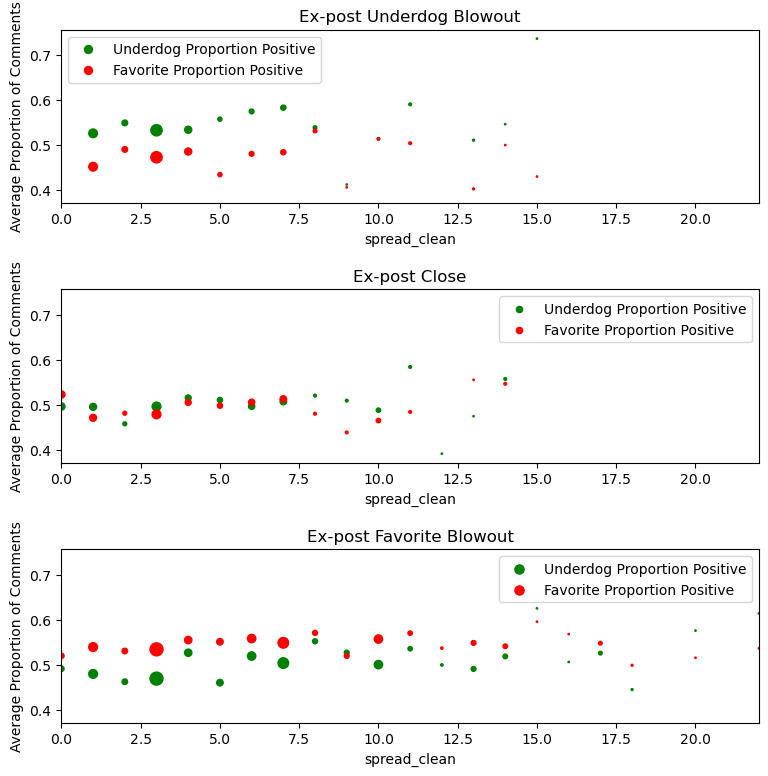

In [114]:
fig, axs = plt.subplots(3, 1, figsize=(9, 9), gridspec_kw={'hspace': 0.5})

weighted_all = True
filter_col_all = 'spread_clean'

min_1, max_1 = make_sentiment_graph(df[post_dog], 
                     title='Ex-post Underdog Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[0], weighted = weighted_all)

min_2, max_2 = make_sentiment_graph(df[post_close], 
                     title='Ex-post Close', 
                     filter_col = filter_col_all, prop = False, ax = axs[1], weighted = weighted_all)

min_3, max_3 = make_sentiment_graph(df[post_fav], 
                     title='Ex-post Favorite Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[2], weighted = weighted_all)

axs[0].set_ylim(min(min_1, min_2, min_3)-0.02, 
                   max(max_1,max_2, max_3)+0.02)
axs[0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1].set_ylim(min(min_1, min_2, min_3)-0.02, 
                   max(max_1,max_2, max_3)+0.02)
axs[1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[2].set_ylim(min(min_1, min_2, min_3)-0.02, 
                   max(max_1,max_2, max_3)+0.02)
axs[2].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

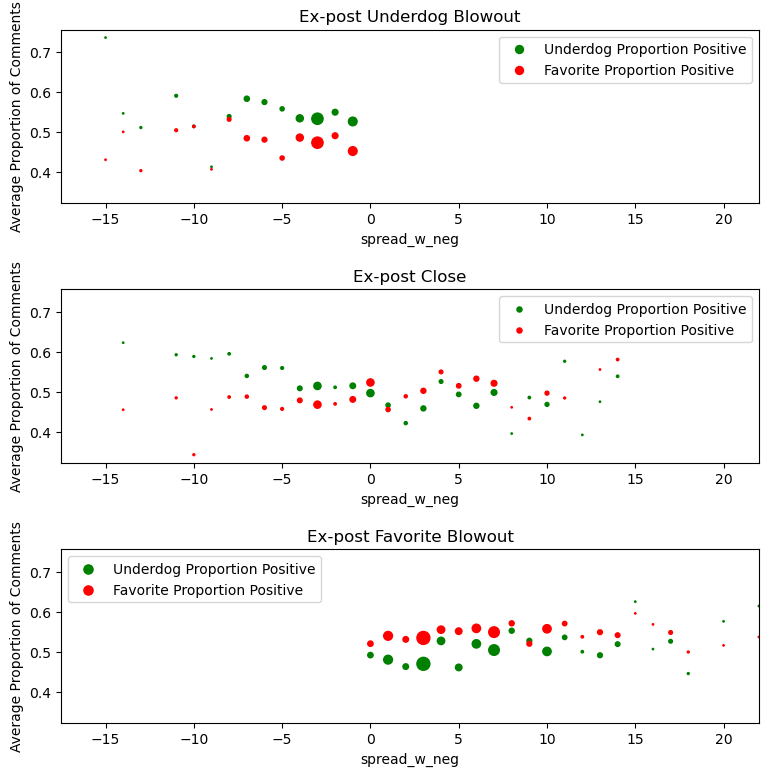

In [115]:
fig, axs = plt.subplots(3, 1, figsize=(9, 9), gridspec_kw={'hspace': 0.5})

weighted_all = True
filter_col_all = 'spread_w_neg'

min_1, max_1 = make_sentiment_graph(df[post_dog], 
                     title='Ex-post Underdog Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[0], weighted = weighted_all)

min_2, max_2 = make_sentiment_graph(df[post_close], 
                     title='Ex-post Close', 
                     filter_col = filter_col_all, prop = False, ax = axs[1], weighted = weighted_all)

min_3, max_3 = make_sentiment_graph(df[post_fav], 
                     title='Ex-post Favorite Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[2], weighted = weighted_all)

axs[0].set_ylim(min(min_1, min_2, min_3)-0.02, 
                   max(max_1,max_2, max_3)+0.02)
axs[0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1].set_ylim(min(min_1, min_2, min_3)-0.02, 
                   max(max_1,max_2, max_3)+0.02)
axs[1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[2].set_ylim(min(min_1, min_2, min_3)-0.02, 
                   max(max_1,max_2, max_3)+0.02)
axs[2].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

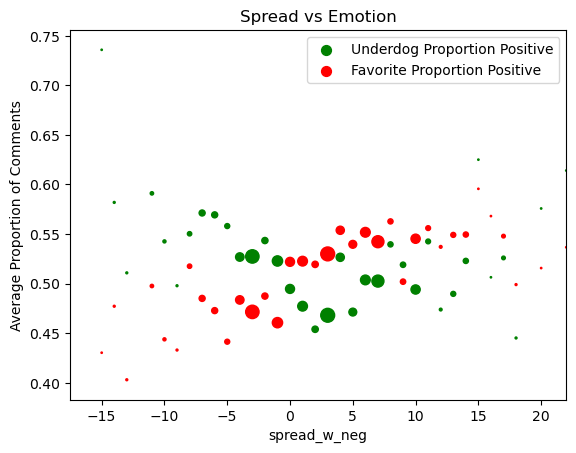

In [187]:
fig, axs = plt.subplots(1, 1)

weighted_all = True
filter_col_all = 'spread_w_neg'

min_1, max_1 = make_sentiment_graph(df, 
                     title='Spread vs Emotion', 
                     filter_col = filter_col_all, prop = False, ax = axs, weighted = weighted_all)

axs.set_ylim(min_1-0.02, max_1+0.02)
axs.set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

# Number of Comments Graphs

In [164]:
def make_num_comments_graph(df, title='', filter_col = 'Score Differential', fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments'],
                            prop = False, round_num = 0, ax = None, weighted = True, clr = 'b'):
    if prop:
        scores = np.arange(0,1.01,0.01)
    else:
        scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
    
    df['fans_col'] = df[fans_list[0]]
    if len(fans_list) > 1:
        for fans in fans_list[1:]:
            df['fans_col'] = df['fans_col'] + df[fans]
    df.loc[:,'fans_col_std'] = (df.loc[:,'fans_col']-np.mean(df.loc[:,'fans_col']))/np.std(df.loc[:,'fans_col'])
    
    mean_fans_comments = []
    num = []
    
    for i in scores:
        smoll_df = df[round(df[filter_col],round_num)==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_fans_comments.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_fans_comments.append(smoll_df['fans_col_std'].mean())

    min_1 = min([x for x in mean_fans_comments if not np.isnan(x)])

    max_1 = max([x for x in mean_fans_comments if not np.isnan(x)])
    
    if ax is None:
        ax = plt.gca()
        
    ax.set_title(title)
    if weighted:
        ax.scatter(scores, mean_fans_comments, color = clr,s=num)
    else:
        ax.scatter(scores, mean_fans_comments, color = clr)
    ax.set_xlabel(filter_col)
    ax.set_ylabel('Standardized Number of Comments')
    ax.set_ylim(min_1-0.02, max_1+0.02)
    
    return min_1, max_1

## Number of Comments vs Final Score

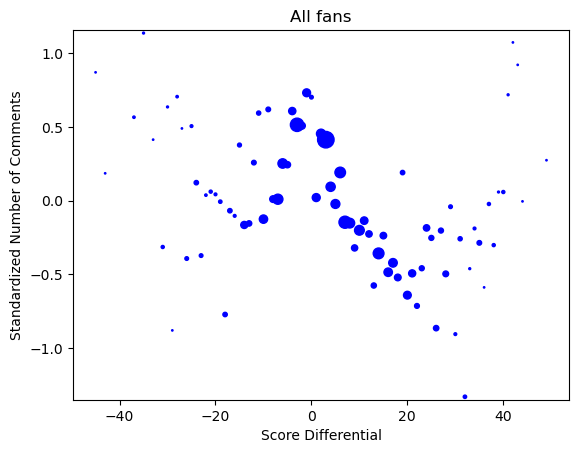

In [195]:
make_num_comments_graph(df, title='All fans', 
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

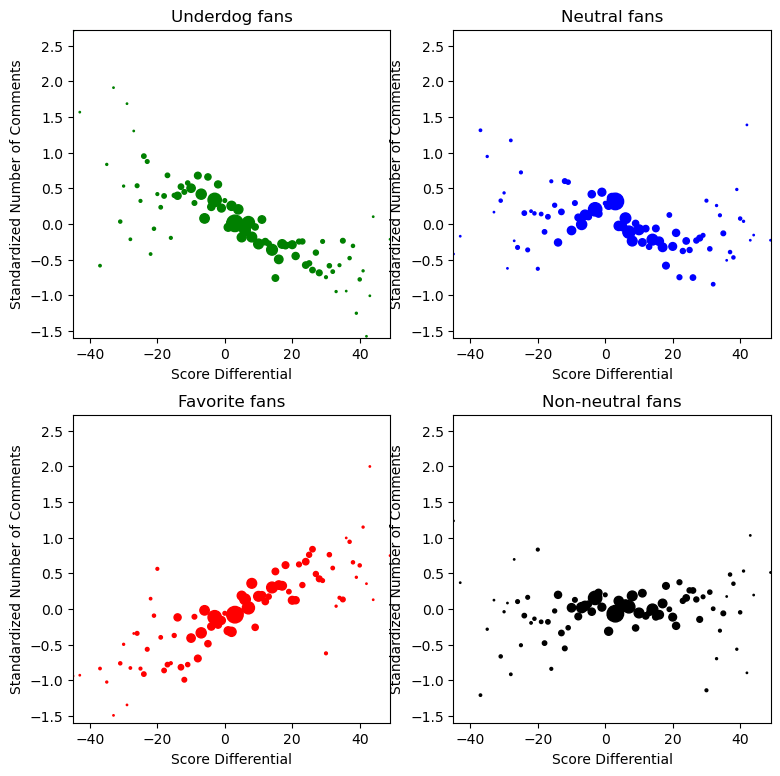

In [196]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

weighted_all = True
filter_col_all = 'Score Differential'

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', 
                        fans_list = ['num_underdog_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', 
                        fans_list = ['num_neutral_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', 
                        fans_list = ['num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', 
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

## Number of Comments vs Spread

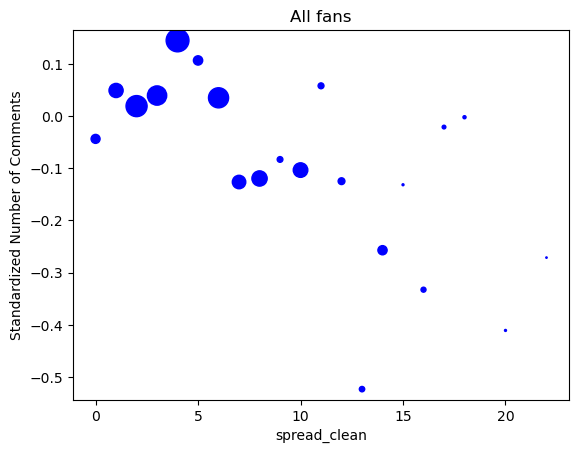

In [197]:
make_num_comments_graph(df, title='All fans', filter_col = 'spread_clean',
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

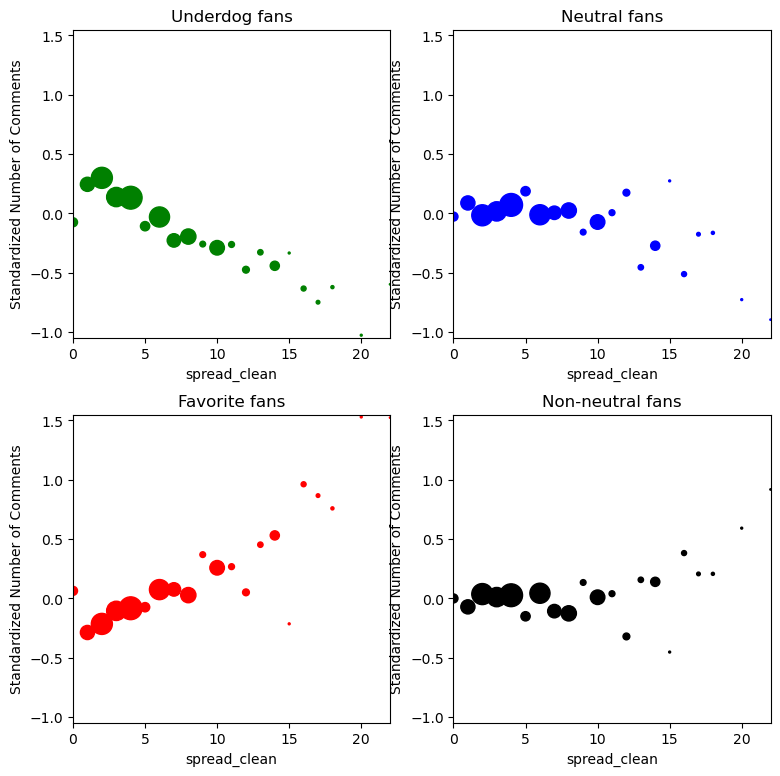

In [198]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

weighted_all = True
filter_col_all = 'spread_clean'

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', 
                        fans_list = ['num_underdog_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', 
                        fans_list = ['num_neutral_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', 
                        fans_list = ['num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', 
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

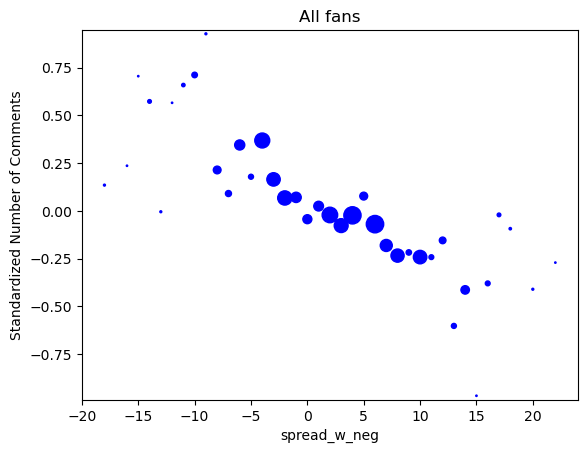

In [199]:
make_num_comments_graph(df, title='All fans', filter_col = 'spread_w_neg',
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

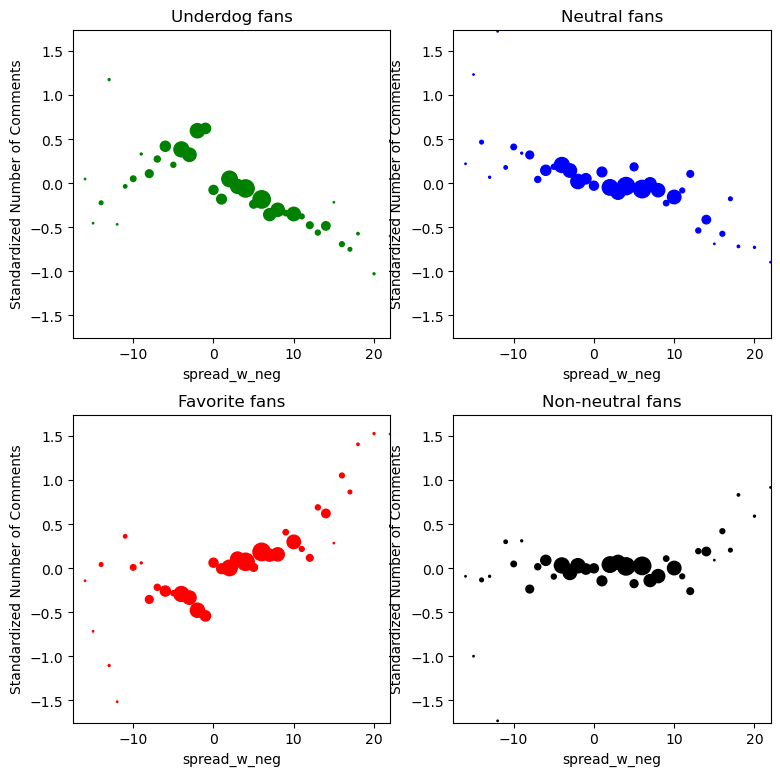

In [200]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

weighted_all = True
filter_col_all = 'spread_w_neg'

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', 
                        fans_list = ['num_underdog_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', 
                        fans_list = ['num_neutral_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', 
                        fans_list = ['num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', 
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

## Number of Comments vs Number of Switches

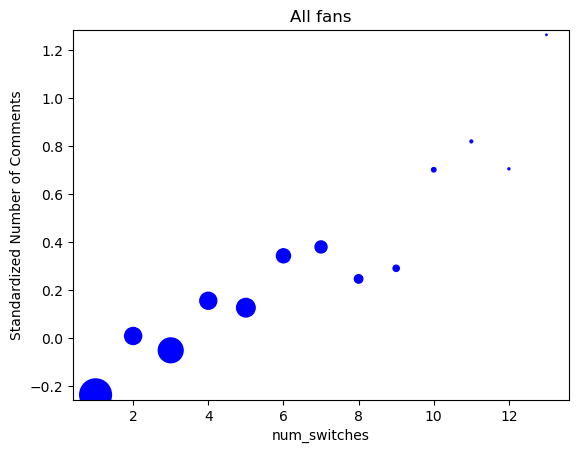

In [201]:
make_num_comments_graph(df, title='All fans', filter_col = 'num_switches',
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

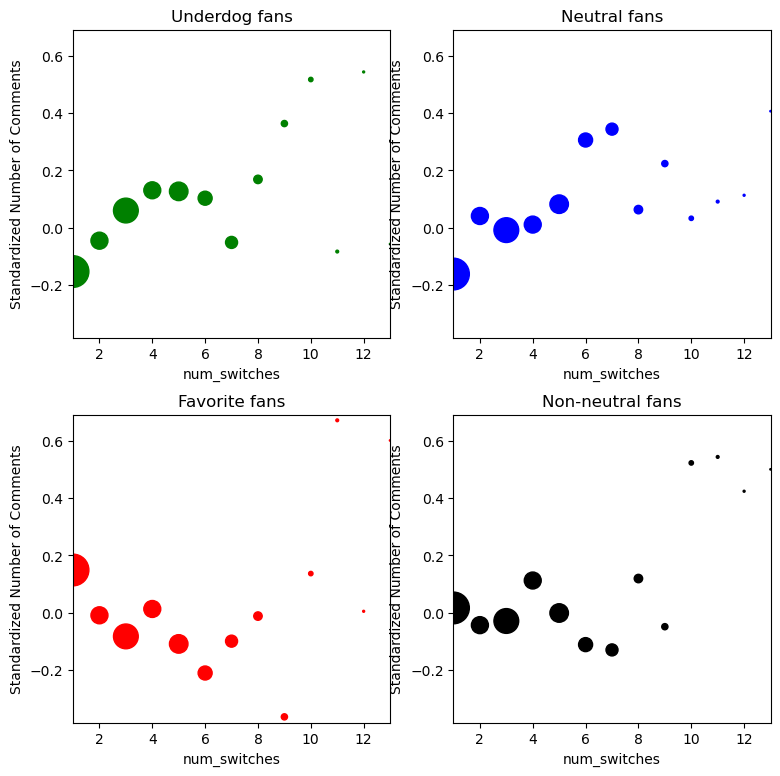

In [202]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

weighted_all = True
filter_col_all = 'num_switches'

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', 
                        fans_list = ['num_underdog_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', 
                        fans_list = ['num_neutral_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', 
                        fans_list = ['num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', 
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

## Number of Comments vs Proportion of Time within 3 points

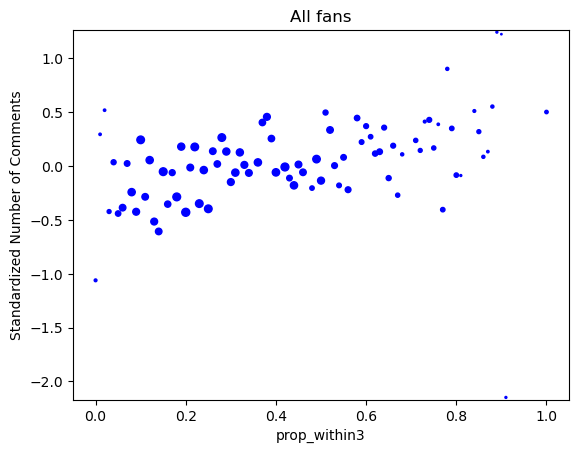

In [203]:
make_num_comments_graph(df, title='All fans', filter_col = 'prop_within3', prop = True, round_num = 2,
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

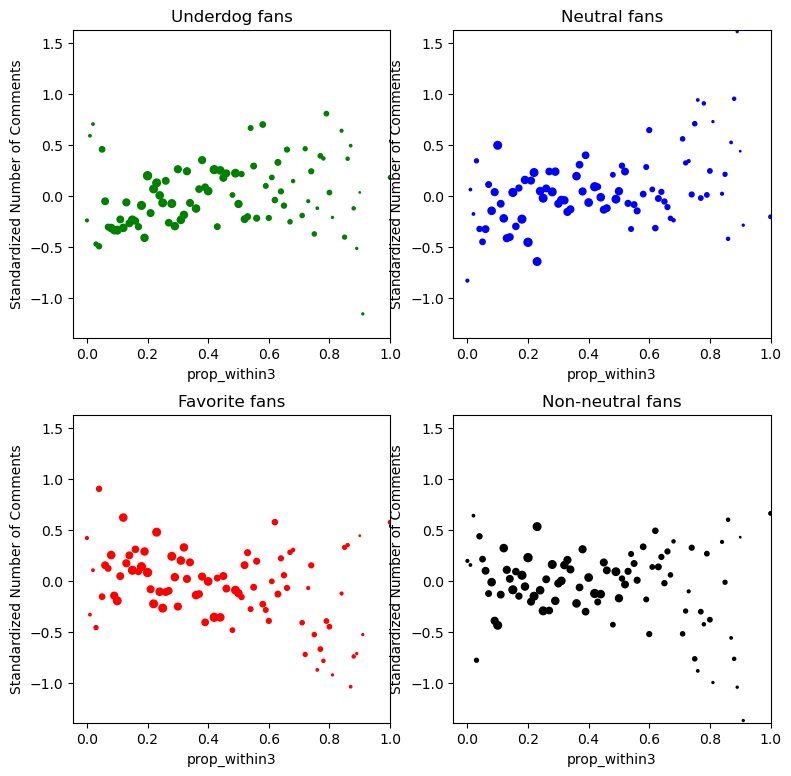

In [204]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

weighted_all = True
filter_col_all = 'prop_within3'
prop_all = True
round_num_all = 2

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', prop = prop_all, round_num = round_num_all,
                        fans_list = ['num_underdog_comments'],
                        filter_col = filter_col_all, ax = axs[0][0], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', prop = prop_all, round_num = round_num_all,
                        fans_list = ['num_neutral_comments'],
                        filter_col = filter_col_all, ax = axs[0][1], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', prop = prop_all, round_num = round_num_all,
                        fans_list = ['num_favorite_comments'],
                        filter_col = filter_col_all, ax = axs[1][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', prop = prop_all, round_num = round_num_all,
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());